In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv('./dataset/advertising.csv')
print(data_frame)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [33]:
X = data_frame.values[:, 1]
y = data_frame.values[:, 3]

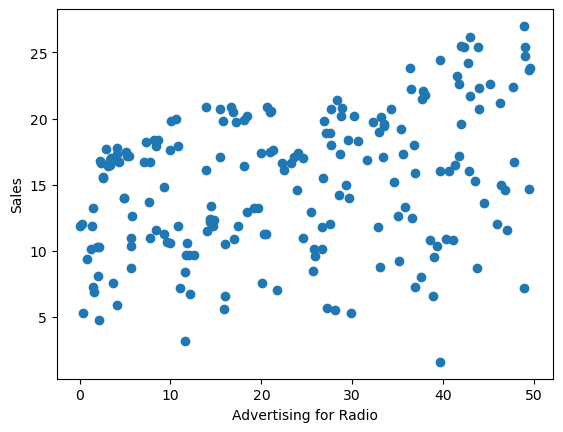

In [34]:
plt.scatter(X, y, marker='o')
plt.xlabel('Advertising for Radio')
plt.ylabel('Sales')
plt.show()

In [35]:
def predict(new_radio, weight, bias):
    return weight*new_radio + bias


def cost_function(X, y, weight, bias):
    n = len(X)
    sum_error = 0
    for i in range(n):
        sum_error += (y[i] - (weight*X[i] + bias))**2
    
    return sum_error/n

def update_weight(X, y, weight, bias, learning_rate):
    n = len(X)
    d_weight = 0.0
    d_bias = 0.0
    for i in range(n):
        d_weight += -2*X[i]*(y[i] - (X[i]*weight + bias))
        d_bias += -2*(y[i] - (X[i]*weight + bias))
    
    weight -= (d_weight/n)*learning_rate
    bias -= (d_bias/n)*learning_rate

    return weight, bias

def train(X, y, weight, bias, learning_rate, iter):
    cost_hist = []
    for i in range(iter):
        weight, bias = update_weight(X, y, weight, bias, learning_rate)
        cost = cost_function(X, y, weight, bias)
        cost_hist.append(cost)

    return weight, bias, cost_hist

In [36]:
weight, bias, cost_hist = train(X, y, -0.34, 0.04, 0.001, 60)
print("Result:\nweight: ", weight,"\nbias: ", bias, "\ncost_hist: ", cost_hist)

Result:
weight:  0.4841831071310686 
bias:  0.47929708312233477 
cost_hist:  [212.7269410755763, 106.77014306298803, 77.80733450284382, 69.86459855012899, 67.66056704300814, 67.02329297501822, 66.81379833286346, 66.72113212511557, 66.66040196846485, 66.60843145382432, 66.55889317208492, 66.51005963832642, 66.46145918715725, 66.41296300293826, 66.36453587106041, 66.31616813086772, 66.2678570982101, 66.2196019936384, 66.17140255775733, 66.12325867320418, 66.07517026144657, 66.02713725460602, 65.97915958776674, 65.93123719687487, 65.88337001816545, 65.83555798800556, 65.78780104285168, 65.74009911923783, 65.69245215377241, 65.64486008313708, 65.59732284408668, 65.54984037344875, 65.50241260812378, 65.45503948508487, 65.4077209413778, 65.36045691412087, 65.3132473405048, 65.26609215779261, 65.21899130331975, 65.17194471449376, 65.12495232879435, 65.07801408377317, 65.0311299170539, 64.98429976633216, 64.93752356937509, 64.89080126402183, 64.84413278818297, 64.79751807984061, 64.75095707704

In [37]:
print("Predict: ", predict(19, weight, bias))

Predict:  9.678776118612639


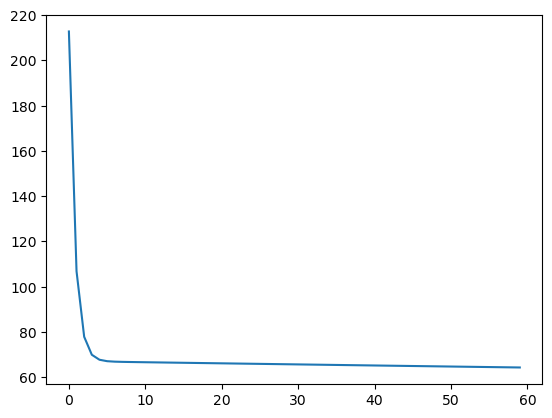

In [38]:
plt.plot([i for i in range(60)], cost_hist)
plt.show()